In [11]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Face Mask Detectin Using CNN**

Importing necessary libraries

In [24]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras # Import keras API
%matplotlib inline

Upload Dataset

In [29]:
# import cv2,os
data_path="/content/drive/MyDrive/face_mask/dataset"
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels))
print(label_dict)
print(categories)
print(labels)

{'with_mask': 0, 'without_mask': 1}
['with_mask', 'without_mask']
[0, 1]


Data Pre-Processing of model

In [30]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from scipy.sparse.construct import random

img_rows, img_cols=112, 112
images=[]
labels=[]

for category in categories:
  folder_path=os.path.join(data_path,category)
  img_names=os.listdir(folder_path)

  for img_name in img_names:
    img_path=os.path.join(folder_path,img_name)
    img=cv2.imread(img_path)

    try:
        # converting image into gray sacle
        grayscale_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
         
        # resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
        resized_img=cv2.resize(grayscale_img,(img_rows,img_cols))
        images.append(resized_img)
        labels.append(label_dict[category])
        # appending

    except Exception as e:
      print('Exception:',e)
      # if any exception
      
images=np.array(images)/255.0
images=np.reshape(images,(images.shape[0],img_rows,img_cols,1))

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
labels = np.array(labels)

(train_x,test_x,train_y,test_y) = train_test_split(images,labels , test_size=0.25,random_state=0)

In [31]:
# with_mask=690, without_mask=686
images.shape

(1376, 112, 112, 1)

In [32]:
train_x.shape, test_x.shape

((1032, 112, 112, 1), (344, 112, 112, 1))

In [33]:
train_y.shape, test_y.shape

((1032, 2), (344, 2))

In [34]:
print(images)

[[[[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [0.99607843]
   [0.99607843]
   [1.        ]]

  ...

  [[1.        ]
   [1.        ]
   [0.99215686]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [0.99215686]
   [0.99607843]
   [0.99607843]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [0.99215686]
   [0.96862745]
   [0.90980392]]]


 [[[0.99215686]
   [0.99215686]
   [0.99215686]
   ...
   [0.99215686]
   [0.99215686]
   [0.99215686]]

  [[0.99215686]
   [0.99215686]
   [0.99215686]
   ...
   [0.99215686]
   [0.99215686]
   [0.99215686]]

  [[0.99215686]
   [0.99215686]
   [0.99215686]
   ...
   [0.99215686]
   [0.99215686]
   [0.99215686]]

  ...

  [[0.99215686]
   [0.99215686]
   [0.9

Build Convolutional Neural Network (CNN)

In [35]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

#model.add(layers.Conv2d(# of filters,(size of filter,eg.(3,3)),activation='relu',input_shape=))
model.add(Conv2D(64,(3,3),input_shape=(img_rows, img_cols,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer

model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

 


In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 110, 110, 64)      640       
                                                                 
 activation_4 (Activation)   (None, 110, 110, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 53, 53, 128)       73856     
                                                                 
 activation_5 (Activation)   (None, 53, 53, 128)       0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)      0         
 2D)                                                  

plot the model

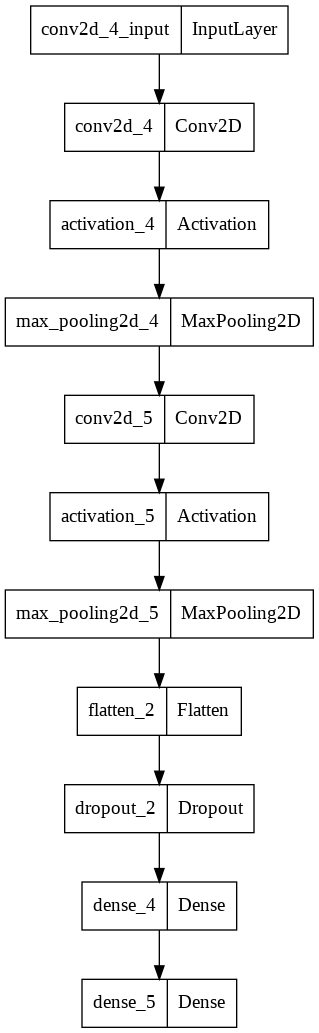

In [37]:
# plot the model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file ='face_mask_detection_architecture.png')

Training the Model

In [38]:
from keras.optimizers import Adam

model.compile(loss="categorical_crossentropy",optimizer= Adam(lr=0.001),metrics=['accuracy'])


fitted_model = model.fit( train_x,train_y,epochs=25,validation_split=0.25)


Epoch 1/25


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 10s 43ms/step - loss: 0.8364 - accuracy: 0.5323 - val_loss: 0.8165 - val_accuracy: 0.4651
Epoch 2/25
25/25 [==============================] - 1s 30ms/step - loss: 0.6466 - accuracy: 0.6318 - val_loss: 0.5712 - val_accuracy: 0.6938
Epoch 3/25
25/25 [==============================] - 1s 32ms/step - loss: 0.4058 - accuracy: 0.8165 - val_loss: 0.7309 - val_accuracy: 0.6279
Epoch 4/25
25/25 [==============================] - 1s 32ms/step - loss: 0.2843 - accuracy: 0.8773 - val_loss: 0.3611 - val_accuracy: 0.8566
Epoch 5/25
25/25 [==============================] - 1s 30ms/step - loss: 0.2098 - accuracy: 0.9109 - val_loss: 0.2683 - val_accuracy: 0.8915
Epoch 6/25
25/25 [==============================] - 1s 30ms/step - loss: 0.1237 - accuracy: 0.9535 - val_loss: 0.2496 - val_accuracy: 0.8915
Epoch 7/25
25/25 [==============================] - 1s 30ms/step - loss: 0.0955 - accuracy: 0.9651 - val_loss: 0.2426 - val_accuracy: 0.8876
Epoch 8/25
25/25 [=====

Plot the Training Loss & Accuracy

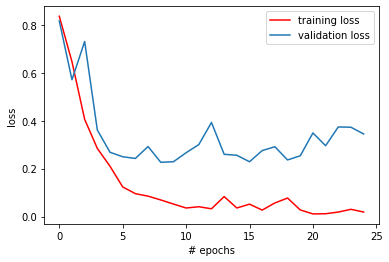

In [39]:
from matplotlib import pyplot as plt
# Plot Training and Validation Loss

plt.plot(fitted_model.history['loss'],'r',label='training loss')
plt.plot(fitted_model.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

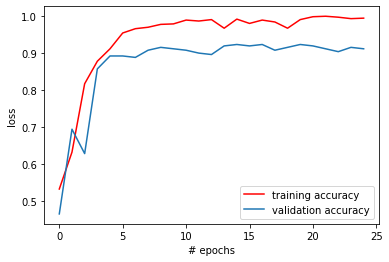

In [40]:
# Plot Training and Validation Accuracy
plt.plot(fitted_model.history['accuracy'],'r',label='training accuracy')
plt.plot(fitted_model.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Model Save

In [41]:
model.save("model.h5")